# Spring 2025 ENVECON/IAS 118 - Introductory Applied Econometrics Problem Set 3
## Due on Gradescope at Midnight, March 4

# Submission Instructions 
For the purposes of this class, we will be using Berkeley's _Datahub_ to conduct our analysis remotely using these notebooks. The data files can be accessed directly  through _Datahub_ and do not require you to install anything on your computer. 

If instead you already have an installation of R/RStudio on your personal computer and prefer to work offline, you can download the data for this assignment from bCourses (Make sure to install/update all packages mentioned in the problem sets in order to prevent issues regarding deprecated or outdated packages).

To submit your completed assignment, go to the file dropdown menu and select the ”Save and export notebook as” dropdown menu. In this menu make sure to select ”PDF”, "Webpdf" or "PDF via Chrome" (if that option appears instead). 

The figures in the problem statement may not show up in the pdf you generate. Once you have downloaded this pdf, make sure it shows all your answers (including code and output). Please **do not print the entire dataset in your submission**. If you viewed the data earlier, remove that line of code and re-run the code cell (as datasets get bigger this adds many pages to pdf submissions and increases the likelihood we miss your answer). 

Upload your submission to Gradescope: https://www.gradescope.com/courses/927499

*Note: Coding Bootcamp [Part 3](https://r.datahub.berkeley.edu/hub/user-redirect/git-pull?repo=https%3A%2F%2Fgithub.com%2Fds-modules%2FENVECON-118-SP23&branch=main&urlpath=retro%2Ftree%2FENVECON-118-SP23%2F1_CodingBootcamp%2FCoding+Bootcamp+Part+3_2023.ipynb) and [Part 4](https://r.datahub.berkeley.edu/hub/user-redirect/git-pull?repo=https%3A%2F%2Fgithub.com%2Fds-modules%2FENVECON-118-SP23&branch=main&urlpath=retro%2Ftree%2FENVECON-118-SP23%2F1_CodingBootcamp%2FCoding+Bootcamp+Part+4_2023.ipynb) covers all necessary R methods.


### Preamble
When writing R code, it's a good habit to start your notebooks or R scripts with a preamble, a section where you load all necessary packages, set paths or change the working directory, or declare other options.

Use the below code cell to load in packages you will use throughout the problem set (at least `haven`, `tidyverse`, and `ggplot2` this week). 

*Note:* **never** try to install packages on Datahub. All packages that you need are already installed and can be loaded immediately using the `library()` function. Attempting to install packages will create conflicts with the package versions on the server and potentially corrupt your notebook.

In [1]:
# Load libraries
library(tidyverse)
library(haven)

# Get rid of scientific display of numbers
options(scipen = 100, digits = 4)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## Question 1: Relationship between Housing Prices (in USD) and Characteristics of US Cities.

This exercise is to be completed using R. We will establish a simple linear relationship between **housing prices and characteristics of cities** in a sample of cities. This is called a hedonic regression, relating price to characteristics. The idea is that if a characteristic is valued in a city, demand for housing increases as people move there, and then housing price increases, all else constant. Vice versa, if people do not value a characteristic, like crime, for example.  

*Note: in economics, log always refers to the natural log, ln().*

### Data description

We will use September 2021 data from Zumper on one-bedroom apartment prices and 2019 data from the FBI on crime for US cities and other characteristics of US cities, such as number of bars, air quality index, wealth of the city measured by GDP, population, whether the city has a winning record majors sports team, as well as the number of sports teams in the major basketball, baseball and American football leagues. The data has 96 cities.

<center><b> Readme for data variables, several sources - collected by Villas-Boas, Fall 2021 </b></center>

|Variable name 	|	Definition	| Source    |
|:-:|:-|:-:|
| city | City name | |
| state | State name | |
|pricesept2021	|	One bedroom housing price, in USD	|	www.Zumper.com	|
|successteams	| Dummy variable =1 if at least one NBA, NFL, or MLB team in a city had a winning record last season (2020 season), =0 otherwise| Google search
|violentcrime2019	| Violent crimes (in thousands) | [FBI](https://ucr.fbi.gov/crime-in-the-u.s/2019/crime-in-the-u.s.-2019/tables/table-8/table-8.xls/view)
|numberbars	| Number of bars, count	| [www.yellowpages.com](www.yellowpages.com)
|aqi2020	| Annual 2020 air quality index (AQI) |	[EPA](https://aqs.epa.gov/aqsweb/airdata/download_files.html#Annual)
|gdp	| Gross domestic product (billion $) |	[BEA](https://apps.bea.gov/itable/iTable.cfm?ReqID=70&step=1&acrdn=5)
|popul2019	| 2019 population (in thousands of people)	| [FBI](https://ucr.fbi.gov/crime-in-the-u.s/2019/crime-in-the-u.s.-2019/tables/table-8/table-8.xls/view)
|nteams	| Number of major professional sports teams	| Google search


For the purposes of this class, we will be using Berkeley's _Datahub_ to conduct our analysis remotely using these notebooks.

If instead you already have an installation of R/RStudio on your personal computer and prefer to work offline, you can download the data for this assignment from bCourses (Make sure to install/update all packages mentioned in the problem sets in order to prevent issues regarding deprecated or outdated packages).

* The data files can be accessed directly  through _Datahub_ and do not require you to install anything on your computer. 
* Before submitting, make sure that all code cells are run with all output fully visible, and **do not print the entire dataset in your submission**. If you viewed the data earlier, remove that line of code and re-run the code cell (as datasets get bigger this adds many pages to pdf submissions and increases the likelihood we miss your answer).

*Note: Coding Bootcamp [Part 3](https://r.datahub.berkeley.edu/hub/user-redirect/git-pull?repo=https%3A%2F%2Fgithub.com%2Fds-modules%2FENVECON-118-SP23&branch=main&urlpath=retro%2Ftree%2FENVECON-118-SP23%2F1_CodingBootcamp%2FCoding+Bootcamp+Part+3_2023.ipynb) and [Part 4](https://r.datahub.berkeley.edu/hub/user-redirect/git-pull?repo=https%3A%2F%2Fgithub.com%2Fds-modules%2FENVECON-118-SP23&branch=main&urlpath=retro%2Ftree%2FENVECON-118-SP23%2F1_CodingBootcamp%2FCoding+Bootcamp+Part+4_2023.ipynb) covers all necessary R methods.

**Ungraded: Data Setup** The dataset is in Stata format (.dta) and was created for the purpose of this problem set only. It is available on bcourses and Datahub and is called **Villas-Boas_2025pset3.dta**.

Read the data into R using
`my_data <- read_dta("Villas-Boas_2025pset3.dta")` 
and create a new variable, *gdpPc*, as the GDP per capita, defined as `(gdp)/(popul2019)`.

Explore each of the variables, including their summary statistics, by using the function *summary()*

In [2]:
# Load data
my_data <- read_dta("Villas-Boas_2025pset3.dta")
my_data <- my_data %>% mutate(gdpPc = (gdp)/(popul2019))

# Summary statistics
summary(my_data)

     city              state           pricesept2021   successteams  
 Length:96          Length:96          Min.   : 580   Min.   :0.000  
 Class :character   Class :character   1st Qu.: 878   1st Qu.:0.000  
 Mode  :character   Mode  :character   Median :1185   Median :0.000  
                                       Mean   :1245   Mean   :0.281  
                                       3rd Qu.:1440   3rd Qu.:1.000  
                                       Max.   :2950   Max.   :1.000  
 violentcrime2019   numberbars      aqi2020           gdp        
 Min.   : 0.12    Min.   :  16   Min.   : 20.0   Min.   :   9.3  
 1st Qu.: 1.25    1st Qu.: 119   1st Qu.: 41.0   1st Qu.:  34.2  
 Median : 2.55    Median : 213   Median : 44.0   Median :  82.0  
 Mean   : 4.70    Mean   : 335   Mean   : 51.1   Mean   : 180.8  
 3rd Qu.: 5.28    3rd Qu.: 428   3rd Qu.: 50.5   3rd Qu.: 226.0  
 Max.   :47.82    Max.   :2113   Max.   :119.0   Max.   :1573.9  
   popul2019        nteams         goodaqi      

**1.** First, generate a variable goodAQI equal to one for cities with aqi2020<=50, and equal to zero otherwise. Compute an estimate for the mean of the housing prices for the goodAQI group (**goodAQI=1**) in the data frame. Construct a 95% confidence interval for this mean. Give an interpretation of these results in a sentence. 

*Use `mean()`, `sd()`, `qt()`, and/or `qnorm()`, to get the necessary information to construct the CI (do not use any canned functions to calculate the confidence interval). Make sure to show all of your intermediate steps and calculations in your answer.*

In [3]:
# Define goodAQI
my_data <- my_data %>%
    mutate(goodAQI = ifelse(aqi2020 <= 50, 1, 0))

# Filter good AQI cities
goodAQI_data <- filter(my_data, goodAQI == 1)

# Calculate mean and sd
(goodAQI_price_mean <- mean(goodAQI_data$pricesept2021))
(goodAQI_price_sd <- sd(goodAQI_data$pricesept2021))
(goodAQI_n <- nrow(goodAQI_data))

# Calculate se
(goodAQI_price_se <- goodAQI_price_sd / sqrt(goodAQI_n))

# Calculate confidence interval at 95% confidence
(critical_95 <- qt(0.025, goodAQI_n-1, lower.tail=FALSE))
goodAQI_price_ci_lower <- goodAQI_price_mean - critical_95 * goodAQI_price_se
goodAQI_price_ci_higher <- goodAQI_price_mean + critical_95 * goodAQI_price_se

# Print results
goodAQI_price_mean
c(goodAQI_price_ci_lower, goodAQI_price_ci_higher)

[1] 1230

[1] 473

[1] 72

[1] 55.74

[1] 1.994

[1] 1230

[1] 1119 1342

➡️ There is a 95% probability that the random interval between \\$1119.27 and \\$1341.56 covers the true mean of a 1-bedroom housing price in cities with good AQI, with an estimated mean of \\$1230.42.

**2.**	Next we will compare housing across the two groups. Let $D$ be the difference in prices between the cities with good AQI (**goodAQI=1**) and not good AQI (**goodAQI=0**) groups. State an estimator $\hat{D}$ for $D$ and use the estimator to compute an estimate of $D$. Compute a standard error for $\hat{D}$. Derive a 90% confidence interval for $D$ and interpret it in one sentence. 

*Use `mean()`, `sd()`, `qt()`, and/or `qnorm()`, to get the necessary information to construct the CI (do not use any canned functions to calculate the confidence interval). Make sure to show all of your intermediate steps and calculations in your answer.*

In [4]:
# Filter bad AQI cities
badAQI_data <- filter(my_data, goodAQI == 0)

# Calculate mean and sd
(badAQI_price_mean <- mean(badAQI_data$pricesept2021))
(badAQI_price_sd <- sd(badAQI_data$pricesept2021))
(badAQI_n <- nrow(badAQI_data))

# Calculate mean difference
(D <- goodAQI_price_mean - badAQI_price_mean)

# Calculate the difference standard error
(D_se <- sqrt((goodAQI_price_sd^2 / goodAQI_n) + (badAQI_price_sd^2 / badAQI_n)))

# Calculate 90% confidence interval
critical_90 <- qt(0.05, goodAQI_n + badAQI_n - 2, lower.tail=FALSE)
D_ci_lower <- D - critical_90 * D_se
D_ci_higher <- D + critical_90 * D_se
c(D_ci_lower, D_ci_higher)

[1] 1288

[1] 484.7

[1] 24

[1] -57.92

[1] 113.6

[1] -246.6  130.7

➡️ There is a 90% probability that the random interval between -\\$246.58 and \\$130.75 covers the true difference between average 1-bedroom housing price in cities with good AQI compared to the price in cities with bad AQI, with an estimated difference of -\\$57.92.

**3.** Next, we will test whether the average housing price **pricesept2021** for the good AQI city group is statistically different at the 10% significance level ($\alpha$ = 0.1) from average housing values in the not good AQI city group. That is, in terms of the hypotheses, test the null hypothesis that average housing prices are equal across these two groups against the alternative hypothesis that the average prices are not equal. Make sure to follow the 5 step-procedure for hypothesis testing, including interpreting your result in one sentence. 


*Use `mean()`, `sd()`, `qt()`, and/or `qnorm()`, to get the necessary information to conduct the hypothesis test (do not use any canned functions to conduct the hypothesis test). Make sure to show all of your intermediate steps and calculations in your answer.*

**3.i: Step 1** State the null ($H_0$) and alternative ($H_A$) hypotheses.

$H_0$: There is no difference in mean 1-bedroom housing price between cities with good and bad AQI. \
$H_a$: There is a difference in mean 1-bedroom housing price between cities with good and bad AQI. \
$H_0: D = 0$\
$H_A: D \neq 0$

**3.ii. Step 2:** Calculate the test statistic

In [5]:
# Test statistic
(t_stat <- D / D_se)

[1] -0.51

The test statistic is:

$t = \frac{-57.92}{113.57} = -0.51$

**3.iii. Step 3:** Find the critical value

In [6]:
# Find the critical value at $alpha = 0.10$ for a two-sided test of a difference in means
(critical_value <- qt(0.05, goodAQI_n + badAQI_n - 2, lower.tail=FALSE))

[1] 1.661

We are conducting a two sided test of a difference in means at the a 10% significance level with 94 degrees of freedom, resulting in a critical value of 1.661


**3.iv. Step 4:** Define the rejection rule

If $|t| > 1.661$, we reject $H_0$, if $|t| <= 1.661$, we fail to reject $H_0$.

**3.v. Step 5:** Decide and interpret

Since $|-0.51| <= 1.661$, we fail to reject the null hypothesis. This means that there is no statistically significant difference in mean 1-bedroom housing prices between cities with good and bad AQI.

**4.**	Let's now look at air quality in the data more closely. **The U.S. AQI is EPA’s index for reporting air quality**. Draw a histogram for **aqi2020** and add a vertical red line at the EPA standard for Spare the Air Day AQI = 100 and a green line at AQI = 50. (https://www.airnow.gov/aqi/aqi-basics/)

For example, in the Bay Area, a Spare the Air Alert is called when air quality is forecast to be unhealthy, or above 100 in the AQI, in any one of the reporting zones. An alert may span over two days if air quality is expected to remain unhealthy for prolonged periods. If air quality is unhealthy in the Bay Area, it is almost always because of two kinds of air [pollutants](https://www.sparetheair.org/understanding-air-quality/air-pollutants-and-health-effects/whos-at-risk): [Ozone](https://www.sparetheair.org/understanding-air-quality/air-pollutants-and-health-effects/ozone) and [fine particulate matter, or PM2.5](https://www.sparetheair.org/understanding-air-quality/air-pollutants-and-health-effects/particulate-matter).

_Hint: see the "Lines" section of Coding Bootcamp Part 4_

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


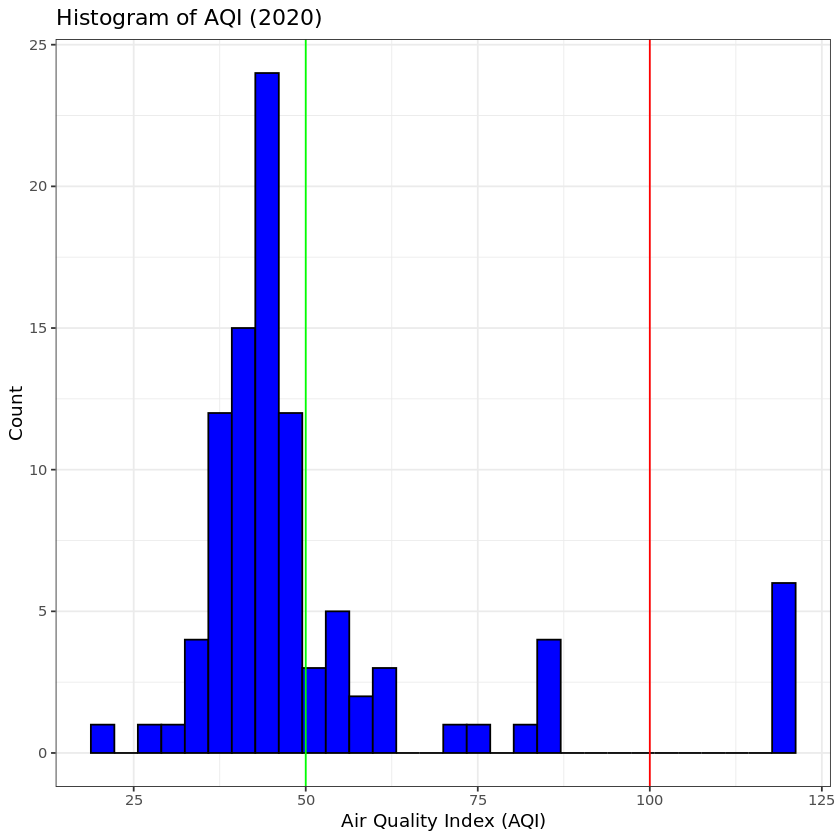

In [7]:
# Draw histogram
ggplot(my_data, aes(x = aqi2020)) +
    geom_histogram(fill = 'blue', color = 'black') +
    geom_vline(xintercept = 100, color = 'red') +
    geom_vline(xintercept = 50, color = 'green') +
    labs(title = 'Histogram of AQI (2020)',
         x = 'Air Quality Index (AQI)',
         y = 'Count') +
    theme_bw() # Optional

**5.**	(a) Regress **pricesept2021** on a constant, **successteams, violentcrime2019, aqi2020, numberbars, gdpPc**. (b) Generate a series of the predicted values of price and plot those against the price data series: What do you see in terms of fit? 


Call:
lm(formula = pricesept2021 ~ successteams + violentcrime2019 + 
    aqi2020 + numberbars + gdpPc, data = my_data)

Residuals:
   Min     1Q Median     3Q    Max 
-825.9 -252.8  -67.1  188.7 1419.4 

Coefficients:
                 Estimate Std. Error t value     Pr(>|t|)    
(Intercept)       807.878    124.962    6.47 0.0000000051 ***
successteams      121.255    120.884    1.00        0.319    
violentcrime2019   -9.136     13.167   -0.69        0.490    
aqi2020             4.395      2.079    2.11        0.037 *  
numberbars          0.635      0.272    2.33        0.022 *  
gdpPc              16.839     37.578    0.45        0.655    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 425 on 90 degrees of freedom
Multiple R-squared:  0.237,	Adjusted R-squared:  0.194 
F-statistic: 5.59 on 5 and 90 DF,  p-value: 0.000158


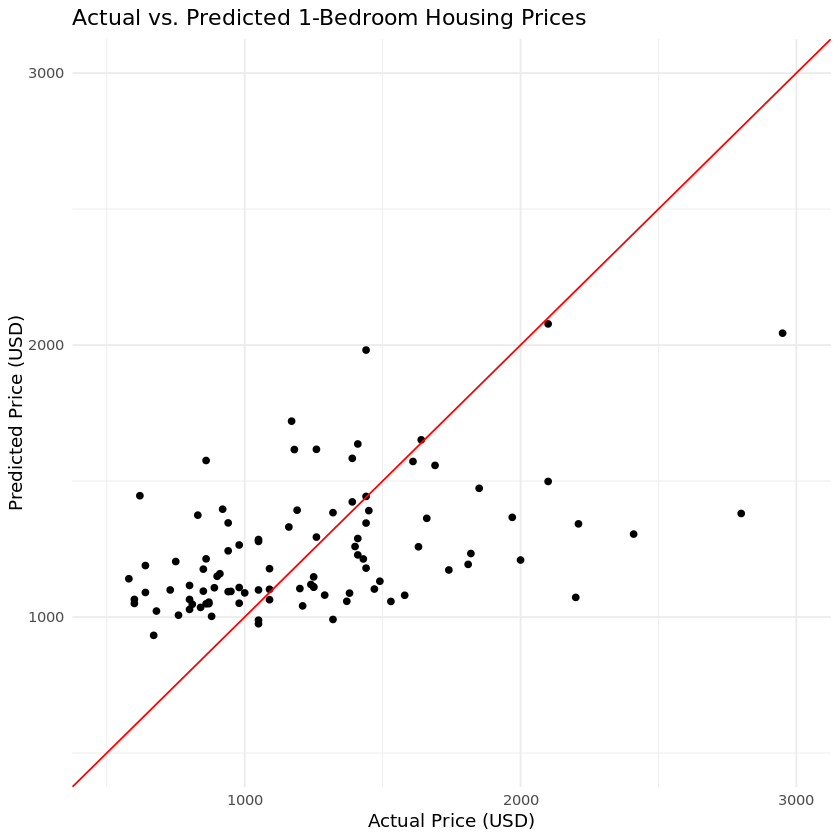

In [8]:
# Run regression
model <- lm(pricesept2021 ~ successteams + violentcrime2019 + aqi2020 + numberbars + gdpPc, data = my_data)
summary(model)

# Predict values
my_data$price_predicted <- predict(model)

# Plot values
ggplot(my_data, aes(x = pricesept2021, y = price_predicted)) +
    geom_point() +
    geom_abline(slope = 1, intercept = 0, color = 'red') + # Optional
    labs(title = 'Actual vs. Predicted 1-Bedroom Housing Prices',
        x = 'Actual Price (USD)',
        y = 'Predicted Price (USD)') +
    lims(x = c(500,3000), y = c(500,3000)) + # Optional
    theme_minimal() # Optional

➡️ The model seems to be overpredicting lower housing prices and underpredicting higher housing prices, suggesting potential heteroskedasticity or omitted variable bias.

**6.**	What is the percent variation of housing prices that the model is explaining, and what percent is the model **NOT** explaining?

➡️ Looking at the $R^2$, the model explains 23.7% of the variation in housing prices. Conversely, 76.3% remains unexplained.

**7.**	Compute the residuals series and plot the residuals on the vertical axis against **gdpPc** in the x axis, using `ggplot()`. When plotting, exclude the outlier city with gdpPc > 6, by setting the ggplot scale limits as follows: `lims(x = c(0, 6), y = c(-1000,1500))`. 

Is the constant variance assumption for the residuals valid or not for different levels of GDP per capita (*gdpPc*) when you look at the scatter plot of the estimated residuals? 

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


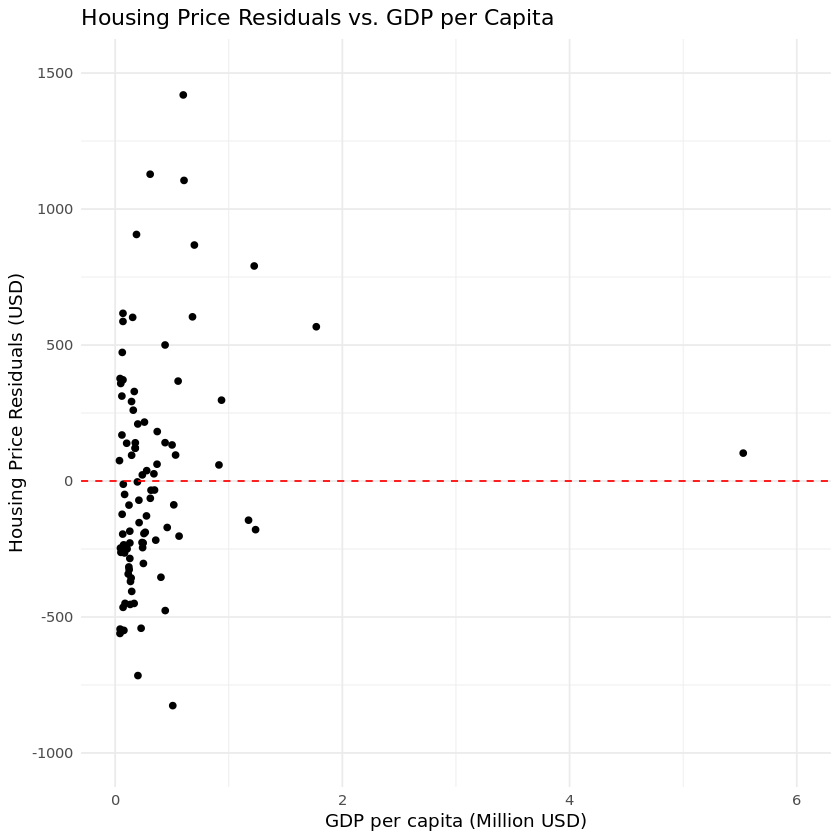

In [9]:
# Calculate residuals
my_data$residuals <- residuals(model)

# Scatter plot of residuals vs GDP per Capita (gdpPc)
ggplot(my_data, aes(x = gdpPc, y = residuals)) +
    geom_point() +
    geom_hline(yintercept = 0, color = 'red', linetype = 'dashed') +
    labs(title = 'Housing Price Residuals vs. GDP per Capita',
         x = 'GDP per capita (Million USD)',
         y = 'Housing Price Residuals (USD)') +
    lims(x = c(0, 6), y = c(-1000, 1500)) +
    theme_minimal()

➡️ The constant variance assumption does not seem valid for different levels of GDP per capita, suggesting heteroskedasticity. The residual variance starts smaller at lower values of GDP per capita, then increases, and then drops again.

**8.**	Using the triplet Sign Size Significance (SSS), let’s interpret two of the coefficients from the model in Question 5. 

**(a)** What can you say of the effect of **aqi2020** on housing prices holding other factors constant? 

➡️ A 1-unit AQI (Air Quality Index) increase is associated with a $4.40 increase in 1-bedroom housing prices, holding all else constant. This effect is statistically significant at the 95% confidence level.

**(b)** What about the coefficient on **numberbars**? Use the (SSS) interpretation again.

➡️ An increase of 1 bar in a city is associated with a $0.64 increase in 1-bedroom housing prices, holding all else constant. This effect is statistically significant at the 95% confidence level.

**9.**	Estimate the correlation between **gdpPc** and the air quality index **aqi2020** across cities. Consider this information along with the estimated coefficients in Question 5's regression. Without running any additional regressions, what will happen to the estimated coefficient of **aqi2020** if you do not include GDP per capita (**gdpPc**) in the estimated regression in question 5? Go through the Omitted Variable formula and explain briefly.

In [10]:
# Calculate correlation
cor(my_data$gdpPc, my_data$aqi2020)

[1] -0.06486

➡️ Using the OVB formula:

$$ \text{Sign(Bias)} = \text{Sign}(\beta_{\text{ov}}) \times \text{Sign}(\rho_{x, \text{ov}})$$

- $ \beta_{\text{ov}} > 0 $ (since GDP per capita positively correlates with housing prices)
- $ \rho_{x, \text{ov}} < 0 $ (since GDP per capita negatively correlated with AQI)
- $ (+) \times (-) = (-) $

Thus, excluding GDP per capita would decrease the AQI coefficient, introducing a downward bias to the model with the omitted variable.

**10.**	Now estimate the model in Question 5 but do not include **gdppc**. What is the new estimate of the coefficient on **aqi2020**, and do you confirm your answer in Question 9? 

In [11]:
# Run regression omitting GDP
model_ovb <- lm(pricesept2021 ~ successteams + violentcrime2019 + aqi2020 + numberbars, data = my_data)
summary(model_ovb)


Call:
lm(formula = pricesept2021 ~ successteams + violentcrime2019 + 
    aqi2020 + numberbars, data = my_data)

Residuals:
   Min     1Q Median     3Q    Max 
-835.0 -257.4  -75.3  194.0 1413.1 

Coefficients:
                 Estimate Std. Error t value     Pr(>|t|)    
(Intercept)       814.332    123.583    6.59 0.0000000028 ***
successteams      130.384    118.630    1.10        0.275    
violentcrime2019  -10.962     12.465   -0.88        0.382    
aqi2020             4.372      2.069    2.11        0.037 *  
numberbars          0.662      0.264    2.50        0.014 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 424 on 91 degrees of freedom
Multiple R-squared:  0.235,	Adjusted R-squared:  0.202 
F-statistic: 6.99 on 4 and 91 DF,  p-value: 0.000059


➡️ As expected, the AQI coefficient decreased from 4.395 to 4.372, confirming our calculations in Question 9.

**11.**	What happens to the R squared ($R^2$) when you do not include the **gdppc** variable in the equation compared to the R squared in Question 5?

In [12]:
# insert your code

➡️ When GDP per capita is omitted, the $R^2$ slightly decreases from 0.237 to 0.235, meaning the model explains slightly less variation in housing prices. This small change could suggest little additional explanatory power for the omitted variable relative to the others.

# Question 2: Insurance Takeup

This question is adapted from the following paper (but you do not need to read the paper to complete the assignment):

Cai, Jing, Alain De Janvry, and Elisabeth Sadoulet. "Subsidy policies and insurance demand." American Economic Review 110.8 (2020): 2422-2453.

The data for this exercise comes from households in 134 villages in the Jiangxi province, which is considered a representative sample of rice producers in Jiangxi. Households were asked whether the household head is literate and also whether they took up a weather insurance product in 2011.

The product in this study is an area-yield index weather insurance that covers natural disasters, including heavy rains, floods, windstorms, extremely high or low temperatures, and droughts. If any of these disasters occur and leads to a 30 percent or more average loss in yield in a given area, farmers that take up insurance in that area are eligible to receive payouts from the insurance company. 

 | | Percent choosing Insurance | Total number of respondents |
 |:--|:--:|:--:|
 | Overall | 52.85 % | 3474|
 | Literate | 53.03% | 2492 |
 | Not Literate|  49.95 % | 979 |

 where *literate* is a dummy variable equal to 1 if the household head is literate, and equal to 0 otherwise

 Let $p$ be the fraction of respondents that choose to take up the insurance product.

**1.**	Use the survey results to estimate $p$. Also estimate the standard error of your estimate. 

*Use `mean()`, `sd()`, `qt()`, and/or `qnorm()` in your answer. (Do not use any canned functions to calculate the test statistic or standard error). Make sure to show all of your intermediate steps and calculations in your answer.*

In [13]:
# Define study values
p_hat <- 0.5285
n <- 3474

# Compute se
(p_se <- sqrt((p_hat * (1 - p_hat)) / n))

[1] 0.008469

➡️ The standard error of $\hat{p}$ is 0.0085.

**2.**	Construct a 95% confidence interval for $p$. Interpret your results in a complete sentence.

*Use `mean()`, `sd()`, `qt()`, and/or `qnorm()`, to get the necessary information to construct the CI (do not use any canned functions to calculate the confidence interval). Make sure to show all of your intermediate steps and calculations in your answer.*

In [14]:
# Calculate critical value
(z_95 <- qnorm(0.025, lower.tail=FALSE))

# Calculate confidence intervals
p_ci_lower <- p_hat - z_95 * p_se
p_ci_upper <- p_hat + z_95 * p_se

# Print
c(p_ci_lower, p_ci_upper)

[1] 1.96

[1] 0.5119 0.5451

➡️ There is a 95% probability that the random interval between 0.51 and 0.55 covers the true proportion of rice producers who choose insurance.

**3.**	Construct a 99% confidence interval for $p$. Is it larger or narrower than the 95% confidence interval? Why? Explain your reasoning in 1-2 sentences.

*Use `mean()`, `sd()`, `qt()`, and/or `qnorm()`, to get the necessary information to construct the CI (do not use any canned functions to calculate the confidence interval). Make sure to show all of your intermediate steps and calculations in your answer.*

In [15]:
# Calculate critical value
(z_99 <- qnorm(0.005, lower.tail=FALSE))

# Calculate confidence intervals
p_ci_lower_99 <- p_hat - z_99 * p_se
p_ci_upper_99 <- p_hat + z_99 * p_se

# Print
c(p_ci_lower_99, p_ci_upper_99)

[1] 2.576

[1] 0.5067 0.5503

➡️ The 99% confidence interval (0.507 to 0.550) is wider than a 95% confidence interval (0.512 to 0.545) because increasing confidence will account for higher potential variability in our proportion estimate. This will result in a higher critical value, which expands the interval.

**4.**	Is there statistical evidence that more than 50% of respondents chose the insurance product? Use the 5 steps for hypothesis testing with a 5% significance level. 

*Use `mean()`, `sd()`, `qt()`, and/or `qnorm()`, to conduct the hypothesis test (do not use any canned functions). Make sure to show all of your intermediate steps and calculations in your answer.*

**4.i: Step 1** State the null () and alternative () hypotheses.

➡️ 

$H_0$: $p <= 0.50$

$H_a$: $p > 0.50$



**4.ii: Step 2:** Calculate the test statistic

In [21]:
# Calculate test statistic
p_se_null <- sqrt(.5*(1-.5)/3474)
z <- (p_hat - 0.50) / p_se_null
p_se_null

[1] 0.008483

Our test statistic is:

$z = \frac{0.5285 - 0.50}{0.0084} = 3.36$


**4.iii: Step 3:** Find the critical value

In [17]:
# Calculate critical value
z_one_tail_95 <- qnorm(0.95)

z_one_tail_95

[1] 1.645

At 5% significance level on a one-sided test, the z critical value is 1.64. Note that the test statistic for a sample proportion is approximately standard normal (z) distributed.


**4.iv: Step 4:** Define the rejection rule

If $z > 1.64$, we reject $H_0$, if $z <= 1.64$, we fail to reject $H_0$.

**4.v: Step 5:** Decide and Interpret

Since $3.36 > 1.64$, we reject the null hypothesis. This means that there is enough statistical evidence to suggest that more than 50% of respondents chose the insurance product at a 95% confidence level.

**5.**	Is there statistical evidence that choosing to take up the insurance product is more likely for respondents that are literate compared to respondents that are not,  at the 1% significance level? Explain. (To answer this question use the 5 steps for hypothesis testing). 

*Use `mean()`, `sd()`, `qt()`, and/or `qnorm()`, to conduct the hypothesis test (do not use any canned functions). Make sure to show all of your intermediate steps and calculations in your answer.*

**5.i: Step 1:** Define the hypotheses

$H_0$: $P_L \leq P_{NL} = P_L - P_{NL} = D \leq 0$

$H_a$: $P_L > P_{NL} = P_L - P_{NL} = D > 0$

**5.ii: Step 2:** Calculate the test statistic

In [18]:
# Define values from survey
p_lit <- 0.5303
n_lit <- 2492
p_nlit <- 0.4995
n_nlit <- 979

# Calculate difference
(D_prop <- p_lit - p_nlit)

# Calculate se
(D_prop_se <- sqrt((p_lit*(1-p_lit)/n_lit) + (p_nlit*(1-p_nlit)/n_nlit)))

# Calculate test statistic
(D_prop_z <- D_prop / D_prop_se)


[1] 0.0308

[1] 0.01885

[1] 1.634

Our test statistic is
$t = \frac{0.0308}{0.0188} = 1.63$

**5.iii: Step 3: Find the critical value**

In [19]:
# Calculate critical value
(z_one_tail_99 <- qnorm(0.99))

[1] 2.326

➡️ At 1% significance level on a one-sided test, the z critical value is 2.3263. Note that the test statistic for a difference in proportions is approximately standard normal (z) distributed.

**5.iv: Step 4** Define the decision rule

For a one sided-test where $H_0: D \leq 0$ and $H_A: D > 0$ the decision rule is that we reject the null hypothesis if the test-statistic > critical value. In other words, we reject the null hypothesis if $t > 2.3263$.

**5.v: Step 5:** Decide and interpret

Since $1.63 < 2.3263$, we fail to reject the null hypothesis. This means that there is no statistically significant evidence that literate households are more likely to take up te insurance product compared to non-literature households at the 1\% significance level. In other words, we cannot reject the null hypothesis that literature households are equally or less likely to take up insurance relative to non-literate households. 

**Please remember to submit your Jupyter Notebook displaying all codes and output.**

<span id="fn1"> Link to the paper if interested: https://www.aeaweb.org/articles?id=10.1257/aer.20190661.</span>